In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
dataset1 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
dataset2 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
dataset3 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
dataset4 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
dataset5 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
dataset6 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
dataset7 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
dataset8 = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

In [3]:
dataset = pd.read_csv("../Datasets/archive/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


In [5]:
df_list = [dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8]
del dataset1
del dataset2
del dataset3
del dataset4
del dataset5
del dataset6
del dataset7
del dataset8
dataset = pd.concat(df_list, ignore_index=True)
del df_list

In [4]:
dataset.at[65, ' Label']


'BENIGN'

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [6]:
# removing rows with empty values and turn all attacks into one label
dataset.replace([np.inf,-np.inf], np.nan, inplace=True)

df = dataset.dropna(axis=0).reset_index(drop=True)
df = df.drop_duplicates(ignore_index=True)
del dataset

In [7]:
df[' Label'].value_counts()

DDoS      128014
BENIGN     95068
Name:  Label, dtype: int64

In [5]:
df = df.drop_duplicates(ignore_index=True)
df[' Label'].value_counts()

BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [8]:
import pyarrow.feather as feather
df.to_feather("s_clean_CIC2017.feather")

In [8]:
df.replace(['DoS Hulk',
                 'PortScan',
                 'DDoS',
                 'DoS GoldenEye',
                 'FTP-Patator',
                 'SSH-Patator',
                 'DoS slowloris',
                 'DoS Slowhttptest',
                 'Bot',
                 'Web Attack � Brute Force',
                 'Web Attack � XSS',
                 'Infiltration',
                 'Web Attack � Sql Injection',
                 'Heartbleed'], 'attack', inplace=True)


In [10]:
df[' Label'].value_counts()

1    128014
0     95068
Name:  Label, dtype: int64

In [19]:
df.to_feather("bin_all_featuresCIC2017.feather")

In [9]:

df.replace('BENIGN', 0, inplace=True)
df.replace('attack', 1, inplace=True)



In [7]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

feat_labels = df.columns[:-1]

forest = RandomForestClassifier(random_state=42)

forest.fit(df.iloc[:,:-1].values,df.iloc[:,-1].values)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

#removed_feature = feat_labels[indices[df.shape[1]-2]]
#print(f"Removed feature: {removed_feature}  {importances[indices[df.shape[1]-2]]}")
#del df[feat_labels[indices[df.shape[1]-2]]]
    
    
for f in range(df.shape[1]-1):
        print("%2d) %-*s %f" % (f + 1, 30, 
                                feat_labels[indices[f]], 
                                importances[indices[f]]))

 1)  Max Packet Length             0.067287
 2)  Avg Bwd Segment Size          0.064442
 3)  Packet Length Variance        0.062988
 4)  Destination Port              0.055817
 5)  Packet Length Std             0.053861
 6)  Average Packet Size           0.049949
 7) Bwd Packet Length Max          0.040835
 8)  Bwd Packet Length Std         0.038608
 9)  Total Length of Bwd Packets   0.030665
10) Init_Win_bytes_forward         0.027872
11)  Subflow Fwd Bytes             0.027620
12)  Bwd Packet Length Mean        0.026743
13)  Subflow Bwd Bytes             0.024452
14)  Packet Length Mean            0.023481
15)  Fwd Header Length.1           0.022650
16)  Avg Fwd Segment Size          0.021930
17) Total Length of Fwd Packets    0.021261
18)  Bwd Header Length             0.018940
19)  Fwd Packet Length Max         0.018578
20)  Fwd IAT Max                   0.014988
21)  Init_Win_bytes_backward       0.014551
22)  Fwd Header Length             0.014227
23)  Fwd Packet Length Mean     

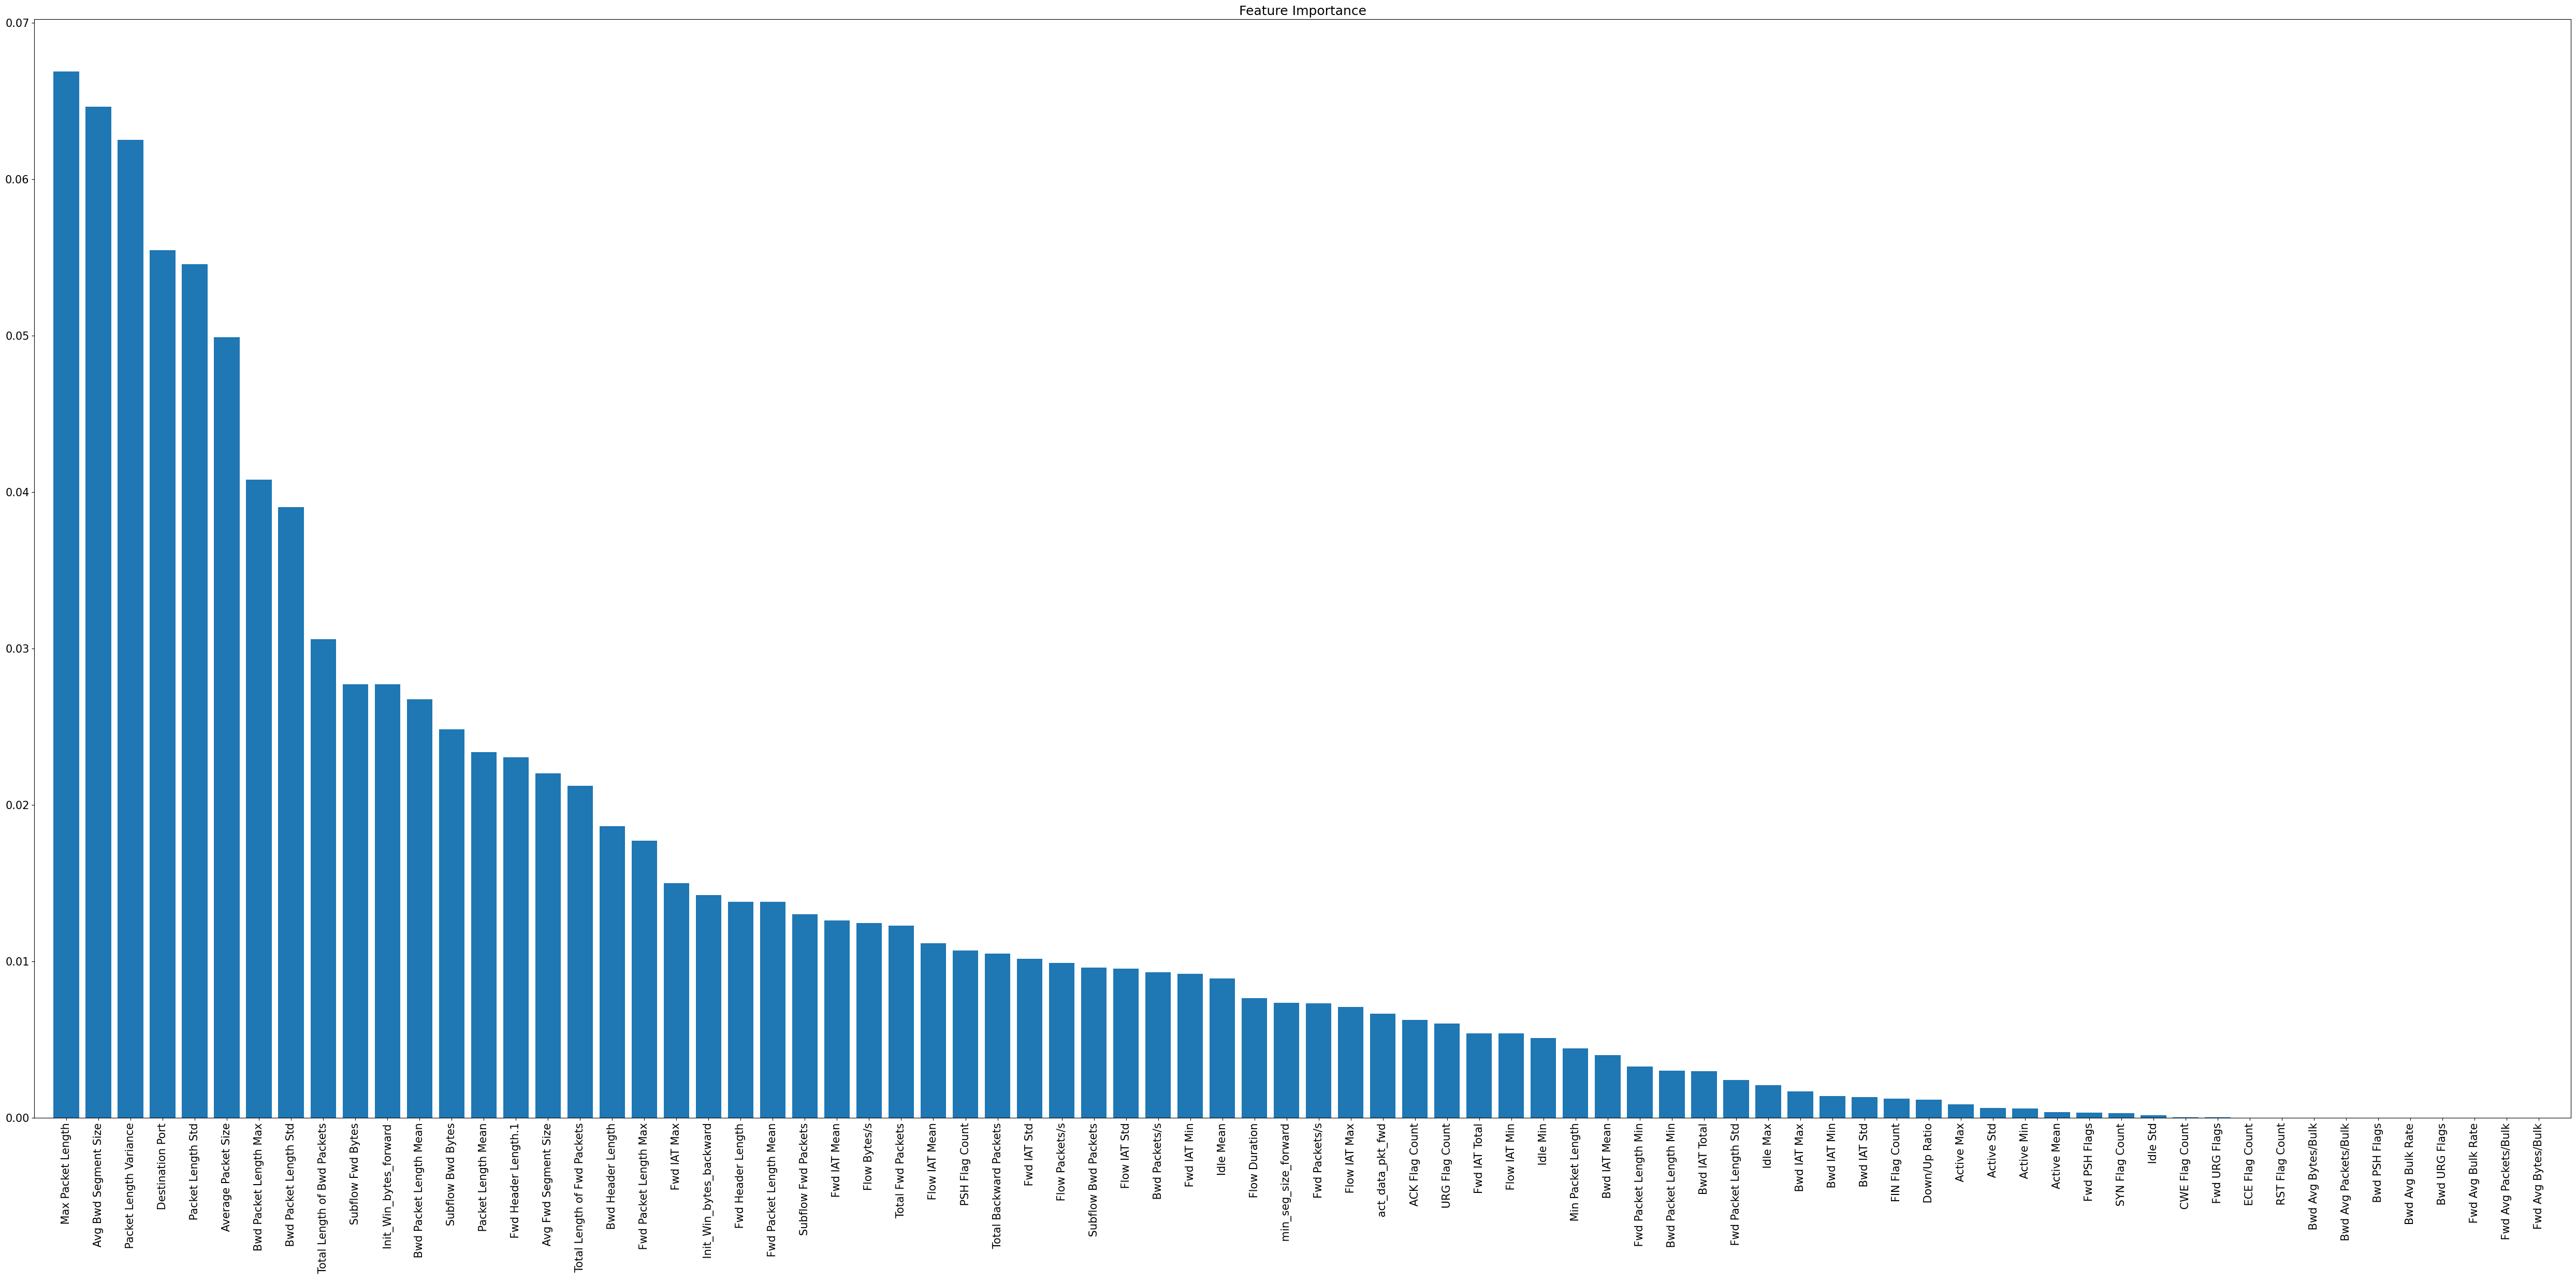

In [6]:
plt.figure(figsize = (50,25))
plt.rc('font', size=15)
plt.title('Feature Importance')
plt.bar(range(df.shape[1]-1), 
        importances[indices],
        align='center')

plt.xticks(range(df.shape[1]-1), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, df.shape[1]-1])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [8]:
for ind in indices:
    if importances[ind] > 1e-02:
        print(feat_labels[ind])

 Max Packet Length
 Avg Bwd Segment Size
 Packet Length Variance
 Destination Port
 Packet Length Std
 Average Packet Size
Bwd Packet Length Max
 Bwd Packet Length Std
 Total Length of Bwd Packets
Init_Win_bytes_forward
 Subflow Fwd Bytes
 Bwd Packet Length Mean
 Subflow Bwd Bytes
 Packet Length Mean
 Fwd Header Length.1
 Avg Fwd Segment Size
Total Length of Fwd Packets
 Bwd Header Length
 Fwd Packet Length Max
 Fwd IAT Max
 Init_Win_bytes_backward
 Fwd Header Length
 Fwd Packet Length Mean
Subflow Fwd Packets
 Fwd IAT Mean
Flow Bytes/s
 Total Fwd Packets
 Flow IAT Mean
 PSH Flag Count
 Fwd IAT Std
 Total Backward Packets


In [9]:
for ind in indices:
    if importances[ind] < 1e-02:
        del df[feat_labels[ind]]

In [10]:
df.head()

,Destination Port,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,...,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Label
0,54865,2,0,12,0,6,6.0,0,0.0,0.0,...,9.0,6.0,0.0,40,2,12,0,33,-1,0
1,55054,1,1,6,6,6,6.0,6,6.0,0.0,...,9.0,6.0,6.0,20,1,6,6,29,256,0
2,55055,1,1,6,6,6,6.0,6,6.0,0.0,...,9.0,6.0,6.0,20,1,6,6,29,256,0
3,46236,1,1,6,6,6,6.0,6,6.0,0.0,...,9.0,6.0,6.0,20,1,6,6,31,329,0
4,54863,2,0,12,0,6,6.0,0,0.0,0.0,...,9.0,6.0,0.0,40,2,12,0,32,-1,0


0    2271320
1     556556
Name:  Label, dtype: int64

In [11]:
df.to_pickle("s_31features_CIC2017.pickle")

In [9]:
df = pd.read_pickle("s_31features_CIC2017.pickle")

In [10]:
df.to_feather("binary_31features_CIC2017.feather")

In [12]:
from sklearn.preprocessing import MinMaxScaler
labels = df[" Label"]
df = df.drop(" Label", axis=1)

# Fit the StandardScaler to the data
scaler = MinMaxScaler().fit(df)

# Apply the scaling to the data
df_scaled = scaler.transform(df)

# Combine the scaled data and the label column
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled[" Label"] = labels

In [16]:
df_scaled.to_feather("DDoS_norm_bin_69feat_CIC2017.feather")

In [14]:
df_scaled[' Label'].value_counts()

1    128014
0     95068
Name:  Label, dtype: int64

In [15]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223082 entries, 0 to 223081
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             223082 non-null  float64
 1    Flow Duration                223082 non-null  float64
 2    Total Fwd Packets            223082 non-null  float64
 3    Total Backward Packets       223082 non-null  float64
 4   Total Length of Fwd Packets   223082 non-null  float64
 5    Total Length of Bwd Packets  223082 non-null  float64
 6    Fwd Packet Length Max        223082 non-null  float64
 7    Fwd Packet Length Min        223082 non-null  float64
 8    Fwd Packet Length Mean       223082 non-null  float64
 9    Fwd Packet Length Std        223082 non-null  float64
 10  Bwd Packet Length Max         223082 non-null  float64
 11   Bwd Packet Length Min        223082 non-null  float64
 12   Bwd Packet Length Mean       223082 non-nul

In [10]:
df = df.drop_duplicates(ignore_index=True)

In [11]:
df[' Label'].value_counts()

0    2036035
1     417887
Name:  Label, dtype: int64

In [24]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(df.iloc[:,:-1].values)

In [10]:
#combined metric
from keras import backend as K




def combined_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2*(precision*recall)/(precision+recall+K.epsilon())
    accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
    return [accuracy,f1_score,precision,recall]


In [11]:
df.at[65, ' Label']


0

In [32]:
df.head()

,Destination Port,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,...,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,Idle Mean,Label
0,54865,2,0,12,6,6.0,0,0,0.0,0.0,...,6.0,0.0,2,12,0,33,-1,1,0.0,0
1,55054,1,1,6,6,6.0,6,6,6.0,0.0,...,6.0,6.0,1,6,1,29,256,0,0.0,0
2,55055,1,1,6,6,6.0,6,6,6.0,0.0,...,6.0,6.0,1,6,1,29,256,0,0.0,0
3,46236,1,1,6,6,6.0,6,6,6.0,0.0,...,6.0,6.0,1,6,1,31,329,0,0.0,0
4,54863,2,0,12,6,6.0,0,0,0.0,0.0,...,6.0,0.0,2,12,0,32,-1,1,0.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 32 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int32  
 1    Total Fwd Packets            int32  
 2    Total Backward Packets       int32  
 3   Total Length of Fwd Packets   int32  
 4    Total Length of Bwd Packets  int32  
 5    Fwd Packet Length Max        int16  
 6    Fwd Packet Length Mean       float64
 7   Bwd Packet Length Max         int16  
 8    Bwd Packet Length Mean       float64
 9    Bwd Packet Length Std        float64
 10  Flow Bytes/s                  float64
 11   Flow IAT Mean                float64
 12   Fwd IAT Mean                 float64
 13   Fwd IAT Std                  float64
 14   Fwd IAT Max                  int32  
 15   Fwd Header Length            int32  
 16   Bwd Header Length            int32  
 17   Max Packet Length            int16  
 18   Packet Length Mean   

In [7]:
df.shape[0]

2827876

In [ ]:
#SHAP

In [ ]:
# itterative feature extravction

#graph for accuracy of each itt


#grid search optimal network size

In [3]:
df = pd.read_feather("bin_all_featuresCIC2017.feather")

In [6]:
df[' Label'].value_counts()

0    2095057
1     425741
Name:  Label, dtype: int64

In [7]:
df.to_feather("bin_all_featuresCIC2017.feather")

In [1]:
# creating result files
import pandas as pd
data = pd.DataFrame(columns=["attack", "accuracy", "precision","recall","f1",
                              "traintime", "episodes"])
data.loc[len(data)] = ["attack",[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0],
                        0.0,999]

# data = pd.DataFrame(columns=["structure", "accuracy", "precision","recall","f1",
#                              "traintime", "episodes"])
# data.loc[len(data)] = ["temp",[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0],[0.0,0.0,0.0],
#                        0.0, 999]
data.to_feather("results/2019_Dos_DNS_results.feather")

In [12]:
data.head()

,epsilon,decay,layers,neurons,accuracy,precision,recall,f1,traintime,episodes,endepsilon,reward,penalty,learnrate,feature_amount,prep
0,0.01,0.01,0,0,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",0.0,10,0.1,0,0,0.0,999,norm


,layers,neurons,progress,traintime
0,0,0,"[0.0, 0.0, 0.0]",0.000000
1,2,2,"[0.484375, 0.503125, 0.55, 0.5125, 0.540625, 0...",-1735.979855
2,2,4,"[0.478125, 0.50625, 0.496875, 0.45, 0.4875, 0....",-1823.179430
3,2,8,"[0.509375, 0.4625, 0.5, 0.51875, 0.46875, 0.52...",1728.703833
4,2,16,"[0.525, 0.44375, 0.478125, 0.4625, 0.515625, 0...",1796.003145


In [7]:
import pandas as pd
df = pd.read_feather("dataset/norm_bin_69feat_CIC2017.feather")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 70 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             float64
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [9]:
selected_features = [" Max Packet Length"," Packet Length Variance", " Packet Length Std"," Bwd Packet Length Mean"," Bwd Packet Length Std",
" Average Packet Size",
" Destination Port",
"Init_Win_bytes_forward",
" Avg Bwd Segment Size",
" Packet Length Mean",
" Subflow Fwd Bytes",
" Subflow Bwd Bytes",
" Init_Win_bytes_backward",
" Fwd Header Length.1",
"Bwd Packet Length Max",
" Flow IAT Mean",
"Total Length of Fwd Packets",
" Total Length of Bwd Packets",
" Fwd Header Length",
" Bwd Header Length",


 " Label"]
selected_data = df[selected_features]
selected_data

,Max Packet Length,Packet Length Variance,Packet Length Std,Bwd Packet Length Mean,Bwd Packet Length Std,Average Packet Size,Destination Port,Init_Win_bytes_forward,Avg Bwd Segment Size,Packet Length Mean,...,Subflow Bwd Bytes,Init_Win_bytes_backward,Fwd Header Length.1,Bwd Packet Length Max,Flow IAT Mean,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Header Length,Bwd Header Length,Label
0,0.000242,0.000000,0.000000,0.000000,0.0,0.002312,0.837186,0.000519,0.000000,0.001798,...,0.000000e+00,0.000000,0.997842,0.000000,1.333333e-07,9.302326e-07,0.000000e+00,0.997842,0.994592,0
1,0.000242,0.000000,0.000000,0.001034,0.0,0.002312,0.840070,0.000458,0.001034,0.001798,...,9.153974e-09,0.003922,0.997842,0.000307,1.016667e-06,4.651163e-07,9.153974e-09,0.997842,0.994592,0
2,0.000242,0.000000,0.000000,0.001034,0.0,0.002312,0.840085,0.000458,0.001034,0.001798,...,9.153974e-09,0.003922,0.997842,0.000307,5.416666e-07,4.651163e-07,9.153974e-09,0.997842,0.994592,0
3,0.000242,0.000000,0.000000,0.001034,0.0,0.002312,0.705516,0.000488,0.001034,0.001798,...,9.153974e-09,0.005035,0.997842,0.000307,3.916666e-07,4.651163e-07,9.153974e-09,0.997842,0.994592,0
4,0.000242,0.000000,0.000000,0.000000,0.0,0.002312,0.837156,0.000504,0.000000,0.001798,...,0.000000e+00,0.000000,0.997842,0.000000,1.333333e-07,9.302326e-07,0.000000e+00,0.997842,0.994592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,0.003062,0.000024,0.004950,0.013102,0.0,0.012500,0.000809,0.000000,0.013102,0.012500,...,2.319007e-07,0.000000,0.997842,0.003891,5.379999e-05,8.682171e-06,2.319007e-07,0.997842,0.994592,0
2520794,0.007293,0.000259,0.016091,0.031204,0.0,0.031336,0.000809,0.000000,0.031204,0.029247,...,5.522898e-07,0.000000,0.997842,0.009268,1.008333e-06,6.511628e-06,5.522898e-07,0.997842,0.994592,0
2520795,0.001249,0.000012,0.003456,0.001034,0.0,0.005822,0.885481,0.015366,0.001034,0.005094,...,9.153974e-09,0.000015,0.997842,0.000307,4.500000e-07,2.403101e-06,9.153974e-09,0.997842,0.994592,0
2520796,0.005157,0.000080,0.008947,0.022067,0.0,0.015411,0.000809,0.000000,0.022067,0.015982,...,3.905696e-07,0.000000,0.997842,0.006554,1.248483e-03,1.488372e-05,3.905696e-07,0.997842,0.994592,0


In [10]:
selected_data.to_feather("norm_bin_20feat_CIC2017.feather")

In [34]:
# create dataset with removed outliners??
df = pd.read_feather("norm_bin_allfeat_CIC2017.feather")


In [11]:
# Define the names of the columns to be dropped
cols_to_drop = [' Fwd Avg Packets/Bulk', ' Bwd Avg Packets/Bulk', ' RST Flag Count', 
                ' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 
                'Bwd Avg Bulk Rate', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk']

# Use the drop method to remove the specified columns from the DataFrame
df = df.drop(cols_to_drop, axis=1)

In [31]:
#df =df.reset_index()
df.to_feather("zsore3_norm_bin_69feat_CIC2017.feather")

In [39]:
df[' Label'].value_counts()

0    2095057
1     425741
Name:  Label, dtype: int64

In [40]:
from scipy import stats
# Set the label you want to filter on
label = 0

# Select only the rows with the specified label
df_label = df[df[' Label'] == label]

# Calculate the Z-score for each column in the filtered DataFrame
z = np.abs(stats.zscore(df_label))



In [41]:
print(z.iloc[0].values)

[2.20449032e+00 3.89953384e-01 1.07600813e-02 1.12875971e-02
 6.06692009e-02 7.77186561e-03 2.94379365e-01 2.56533405e-01
 3.01905194e-01 2.49899790e-01 5.08586883e-01 6.91950549e-01
 5.84799711e-01 4.69915810e-01 7.99075031e-02 2.80551539e+00
 2.32176329e-01 2.80863257e-01 3.22207146e-01 5.50564757e-02
 3.80325559e-01 2.12886747e-01 2.79912127e-01 3.09270221e-01
 1.31343608e-01 3.64795252e-01 2.01953483e-01 2.49145667e-01
 2.84076497e-01 1.30899306e-01 2.44952114e-01 6.17952885e-03
 2.68954124e-03 1.83606693e-03 2.94375745e+00 1.65118281e-01
 5.26007582e-01 4.74158739e-01 5.69609755e-01 5.03380111e-01
 2.08485466e-01 1.02954709e-01 2.44952114e-01 6.04854712e-01
 1.56395443e+00 3.71034198e-01 6.17952885e-03 1.81377376e-02
 1.00603844e+00 6.02061143e-01 3.01905194e-01 5.84799711e-01
 2.68954124e-03 1.07600813e-02 6.07583501e-02 1.12875971e-02
 7.77179660e-03 4.77727131e-01 2.69145675e-01 7.85678385e-03
 8.55807420e-01 1.24736016e-01 1.18791570e-01 1.57467958e-01
 9.49431584e-02 2.901312

In [46]:
columns_to_include = [col for col in df.columns if col != ' Label']
df_filtered[columns_to_include] = df_label[columns_to_include][(np.abs(stats.zscore(df_label[columns_to_include])) < 3).all(axis=1)]
df_filtered

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,0.000809,2.685666e-04,0.000014,0.000007,8.682171e-06,2.319007e-07,0.001128,0.012043,0.004713,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2520794,0.000809,2.808333e-06,0.000005,0.000007,6.511628e-06,5.522898e-07,0.001692,0.018065,0.007070,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2520795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2520796,0.000809,8.738733e-03,0.000023,0.000007,1.488372e-05,3.905696e-07,0.001289,0.013763,0.005386,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [47]:
# Replace the original rows with the filtered rows
df[df[' Label'] == label] = df_filtered

In [55]:
df[' Label'].value_counts()

0    1488118
1     425741
Name:  Label, dtype: int64

In [49]:
df = df.dropna()

In [54]:
df[' Label'].value_counts()

0    1488118
1     425741
Name:  Label, dtype: int64

In [44]:
print(df.iloc[2520795])

 Destination Port              8.854810e-01
 Flow Duration                 7.916666e-07
 Total Fwd Packets             4.550460e-06
 Total Backward Packets        3.425573e-06
Total Length of Fwd Packets    2.403101e-06
                                   ...     
Idle Mean                      0.000000e+00
 Idle Std                      0.000000e+00
 Idle Max                      0.000000e+00
 Idle Min                      0.000000e+00
 Label                         0.000000e+00
Name: 2520795, Length: 70, dtype: float64


In [53]:
df = pd.read_feather("zsore3_norm_bin_69feat_CIC2017.feather")


In [29]:
df.drop(columns='index', inplace=True)
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.00101,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.00101,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [54]:
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913854,0.752972,1.316667e-06,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,...,0.042969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1913855,0.000809,2.685666e-04,0.000014,0.000007,8.682171e-06,2.319007e-07,0.001128,0.012043,0.004713,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1913856,0.000809,2.808333e-06,0.000005,0.000007,6.511628e-06,5.522898e-07,0.001692,0.018065,0.007070,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1913857,0.000809,8.738733e-03,0.000023,0.000007,1.488372e-05,3.905696e-07,0.001289,0.013763,0.005386,0.0,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [20]:
label_counts = df[' Label'].value_counts()

# Determine the minimum frequency across all labels
min_count = 1

# Create a list to store the selected rows from each label group
selected_rows = []

# Iterate over each label group
for label, group in df.groupby(' Label'):
    # Sample the minimum number of rows from the group
    selected_rows.append(group.sample(min_count, random_state=42))

# Concatenate the selected rows from each group into a new DataFrame
balanced_df = pd.concat(selected_rows)

In [21]:
balanced_df[' Label'].value_counts()

0    1
1    1
Name:  Label, dtype: int64

In [22]:
balanced_df = balanced_df.reset_index(drop=True)

In [13]:
balanced_df.to_feather("2_ datapoints_balanced_zsore3_norm_bin_69feat_CIC2017.feather")

In [23]:
balanced_df.head()

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,2390955,0.000809,0.000264,0.000005,0.000007,0.000006,5.431358e-07,0.001531,0.016344,0.006396,...,0.042969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,92008,0.001221,0.009306,0.000009,0.000017,0.000002,1.770836e-05,0.000806,0.000000,0.001459,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [51]:
new_df = df.iloc[[92008]]
new_df.reset_index(drop=True, inplace=True)

In [52]:
new_df.to_feather("1_ datapoints_balanced_zsore3_norm_bin_69feat_CIC2017.feather")

In [59]:
a = [0.71, 0.2]
print(np.argmax(a))

print(np.argmax(np.argmax(a)))

0
0


In [9]:
ndf = pd.read_feather("norm_6feat_CIC2017.feather")

In [10]:
ndf[' Label'].value_counts()

0    2095057
1     425741
Name:  Label, dtype: int64

In [7]:
ndf

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.837186,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.840070,1.016667e-06,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.840085,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.705516,3.916666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.837156,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000242,0.002581,0.001010,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,0.000809,2.685666e-04,0.000014,0.000007,8.682171e-06,2.319007e-07,0.001128,0.012043,0.004713,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2520794,0.000809,2.808333e-06,0.000005,0.000007,6.511628e-06,5.522898e-07,0.001692,0.018065,0.007070,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2520795,0.885481,7.916666e-07,0.000005,0.000003,2.403101e-06,9.153974e-09,0.001249,0.000000,0.002609,0.003076,...,0.042969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2520796,0.000809,8.738733e-03,0.000023,0.000007,1.488372e-05,3.905696e-07,0.001289,0.013763,0.005386,0.000000,...,0.027344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
